In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("blogs.csv")

In [3]:
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [4]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [5]:
df.shape

(2000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [7]:
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [8]:
df['Labels'].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [9]:
df['Labels'].value_counts()

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64

### Text Preprocessing

In [10]:
#pip install nltk
#nltk.download('punkt')
#nltk.download('punkt_tab')
#nltk.download('stopwords')
#nltk.download('movie_reviews')

In [11]:
stop_words = set(stopwords.words('english'))

In [12]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [13]:
df['cleaned_text'] = df['Data'].apply(clean_text)

In [14]:
(df['cleaned_text'].head())

0    path cantaloupesrvcscmuedumagnesiumclubcccmued...
1    newsgroups altatheism path cantaloupesrvcscmue...
2    path cantaloupesrvcscmuedudasnewsharvardedunoc...
3    path cantaloupesrvcscmuedumagnesiumclubcccmued...
4    xref cantaloupesrvcscmuedu altatheism talkreli...
Name: cleaned_text, dtype: object

In [15]:
vectorizer = TfidfVectorizer()

In [16]:
feature = vectorizer.fit_transform(df['cleaned_text'])
print(feature.shape)

(2000, 46006)


### Modeling with Naive Bayes

In [17]:
x_train, x_test, y_train, y_test = train_test_split(feature, df['Labels'], test_size=0.2, random_state=42)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 46006)
(400, 46006)
(1600,)
(400,)


In [19]:
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

MultinomialNB()

In [20]:
# Predict on the test set
y_pred = nb_model.predict(x_test)

In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.84


In [22]:
# Classification report for detailed metrics
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.53      0.89      0.67        18
           comp.graphics       0.76      0.89      0.82        18
 comp.os.ms-windows.misc       0.95      0.91      0.93        22
comp.sys.ibm.pc.hardware       0.90      0.76      0.83        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       1.00      0.84      0.91        25
            misc.forsale       1.00      0.72      0.84        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.83      0.83      0.83        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.83      1.00      0.90        19
         sci.electronics       0.70      0.88      0.78        16
                 sci.med       0.88      0.88      0.88        17
         

### Sentiment Analysis

In [23]:
## sentiment Analysis with TextBlob

## Use TextBlob to analyze the sentiment of the blog posts.

In [24]:
#pip install textblob

In [25]:
def get_sentiment(text):
    blob = TextBlob(text)
    # Classify sentiment as 'positive', 'negative', or 'neutral'
    if blob.sentiment.polarity > 0:
        return 'positive'
    elif blob.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [26]:
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

In [27]:
print(df[['Data', 'sentiment']].head())

                                                Data sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  positive


In [28]:
def get_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    
    # Get the polarity score of the text
    polarity = blob.sentiment.polarity
    
    # Classify sentiment based on polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [29]:
df['Sentiment'] = df['Data'].apply(get_sentiment)

# Show the first few rows of the dataframe
print(df[['Data', 'Sentiment']].head())

                                                Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive


In [30]:
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)

In [31]:
print(sentiment_distribution)

Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc              14        86


<Figure size 1000x600 with 0 Axes>

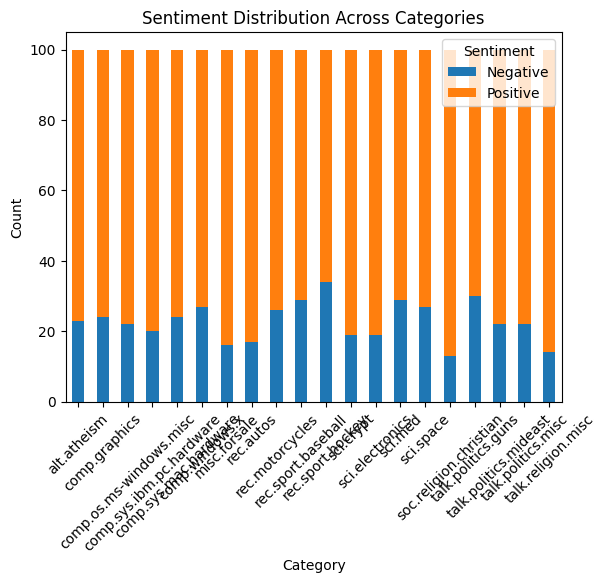

In [32]:
plt.figure(figsize=(10, 6))
sentiment_distribution.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()

In [33]:
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')

In [34]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.84
Precision: 0.85
Recall: 0.84
F1 Score: 0.83


### **Discussion on Model Performance and Challenges**  

#### **Naive Bayes Model Performance**  
- **Accuracy (84%)** shows good performance but can be misleading if categories are imbalanced.  
- **Precision (85%)** indicates fewer false positives.  
- **Recall (84%)** shows the model correctly identifies most actual cases.  
- **F1-Score (83%)** balances precision and recall, useful for imbalanced datasets.  

#### **Challenges Faced**  
- **Imbalanced Data:** Frequent categories dominate predictions.  
- **Preprocessing Issues:** Handling special characters and short texts affects quality.  
- **Feature Extraction:** Stopwords, n-grams, and rare words impact performance.  


### **Sentiment Analysis Evaluation**  
 
- **Sentiment Distribution:** Categories with more **positive** sentiment may indicate engaging content.  
- **Subjectivity vs. Objectivity:** Technical blogs tend to be neutral, while opinion-based content leans positive/negative.  
- **Category Correlation:** Lifestyle topics may be **positive**, while debates or critiques may lean **negative**.  
  

 
